# House Prices Predicting

In [1]:
from IPython.display import display
pd.options.display.max_columns = None

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

from scipy import stats
from scipy.stats import skew,norm

### 데이터 불러오기 및 정리

In [2]:
# 데이터 불러오기
df_origin = pd.read_csv('train.csv')

In [3]:
# 컬럼 확인
df_origin.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
len(df_origin.columns)

81

In [5]:
# 분석에 필요없는 컬럼 'Id' 제거
df = df_origin.drop('Id', axis=1)

In [6]:
# 트레인셋 & 테스트셋 으로 분리
df_train, df_test = train_test_split(df, train_size= 0.7, test_size = 0.3)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 223 to 1428
Data columns (total 80 columns):
MSSubClass       1021 non-null int64
MSZoning         1021 non-null object
LotFrontage      850 non-null float64
LotArea          1021 non-null int64
Street           1021 non-null object
Alley            70 non-null object
LotShape         1021 non-null object
LandContour      1021 non-null object
Utilities        1021 non-null object
LotConfig        1021 non-null object
LandSlope        1021 non-null object
Neighborhood     1021 non-null object
Condition1       1021 non-null object
Condition2       1021 non-null object
BldgType         1021 non-null object
HouseStyle       1021 non-null object
OverallQual      1021 non-null int64
OverallCond      1021 non-null int64
YearBuilt        1021 non-null int64
YearRemodAdd     1021 non-null int64
RoofStyle        1021 non-null object
RoofMatl         1021 non-null object
Exterior1st      1021 non-null object
Exterior2nd      1021 non

In [8]:
# 예측값인 'SalePrice' 컬럼 내역 확인
df_train['SalePrice'].describe()

count      1021.000000
mean     178972.932419
std       78156.650459
min       35311.000000
25%      130000.000000
50%      162000.000000
75%      210000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to NanumBarunGothic.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to NanumBarunGothic.
  (prop.get_family(), self.defaultFamily[fontext]))


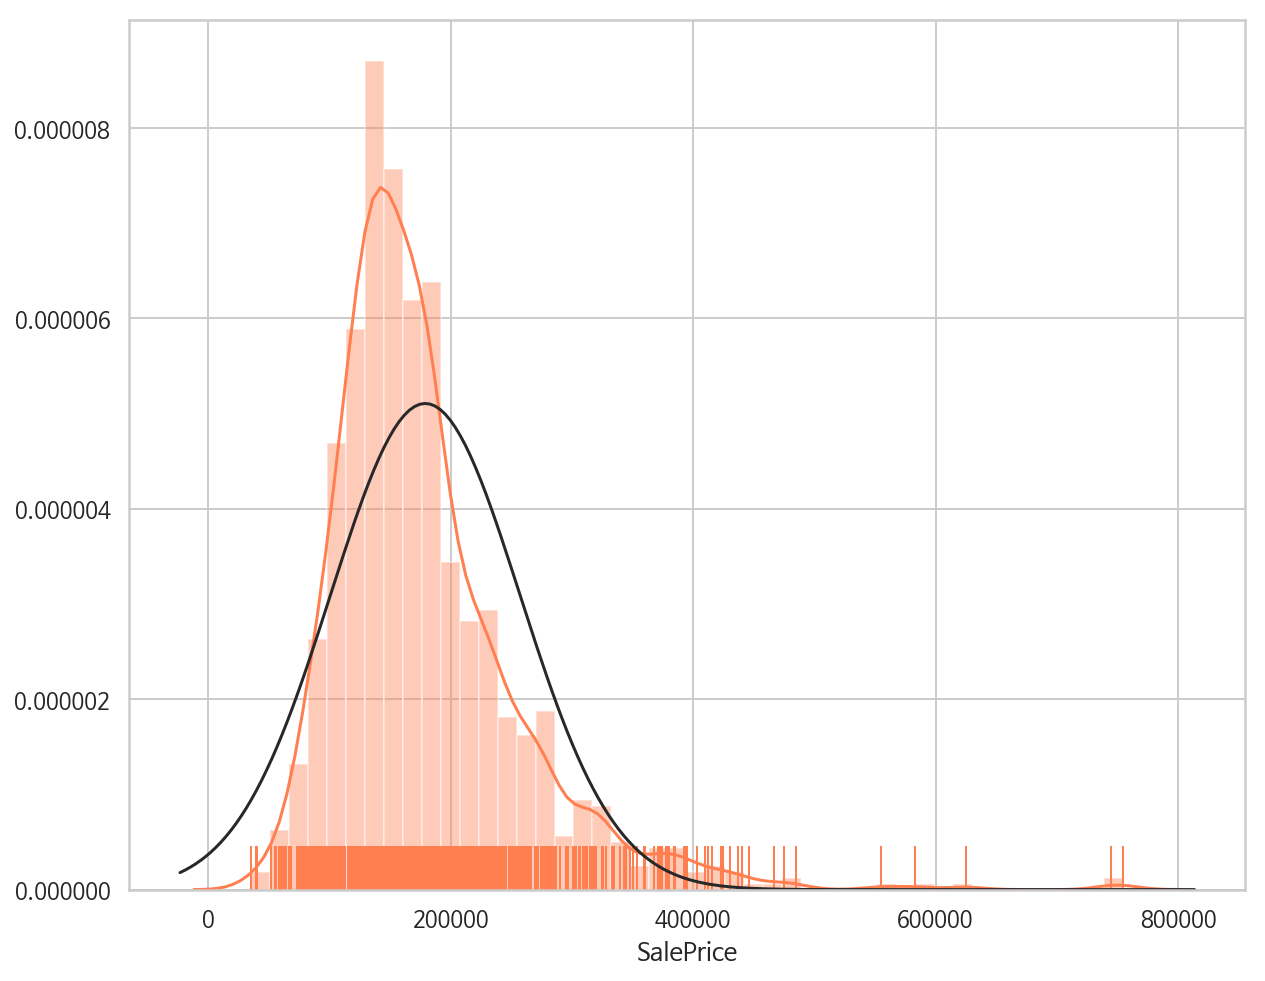

In [9]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['SalePrice'], color='coral', fit=norm, rug=True)

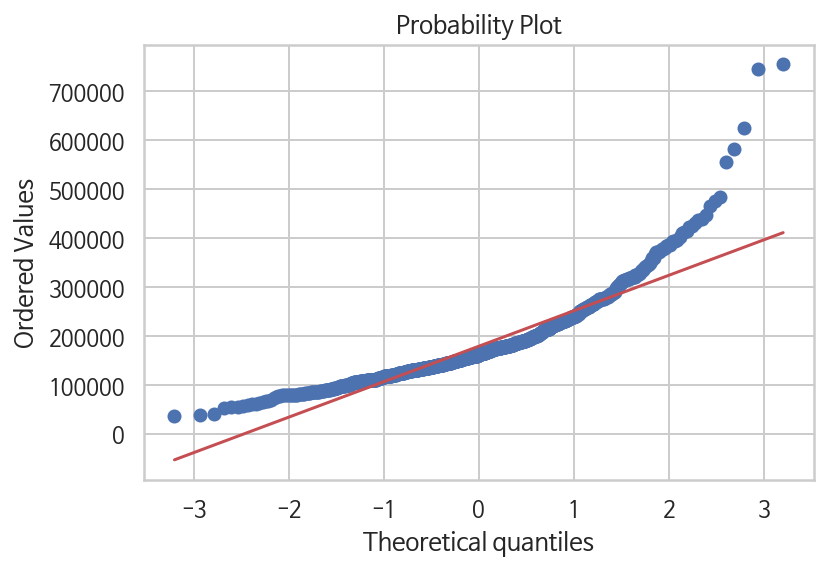

In [10]:
# normal distribution check
res = stats.probplot(df_train['SalePrice'], plot=plt)

### 데이터 상관관계

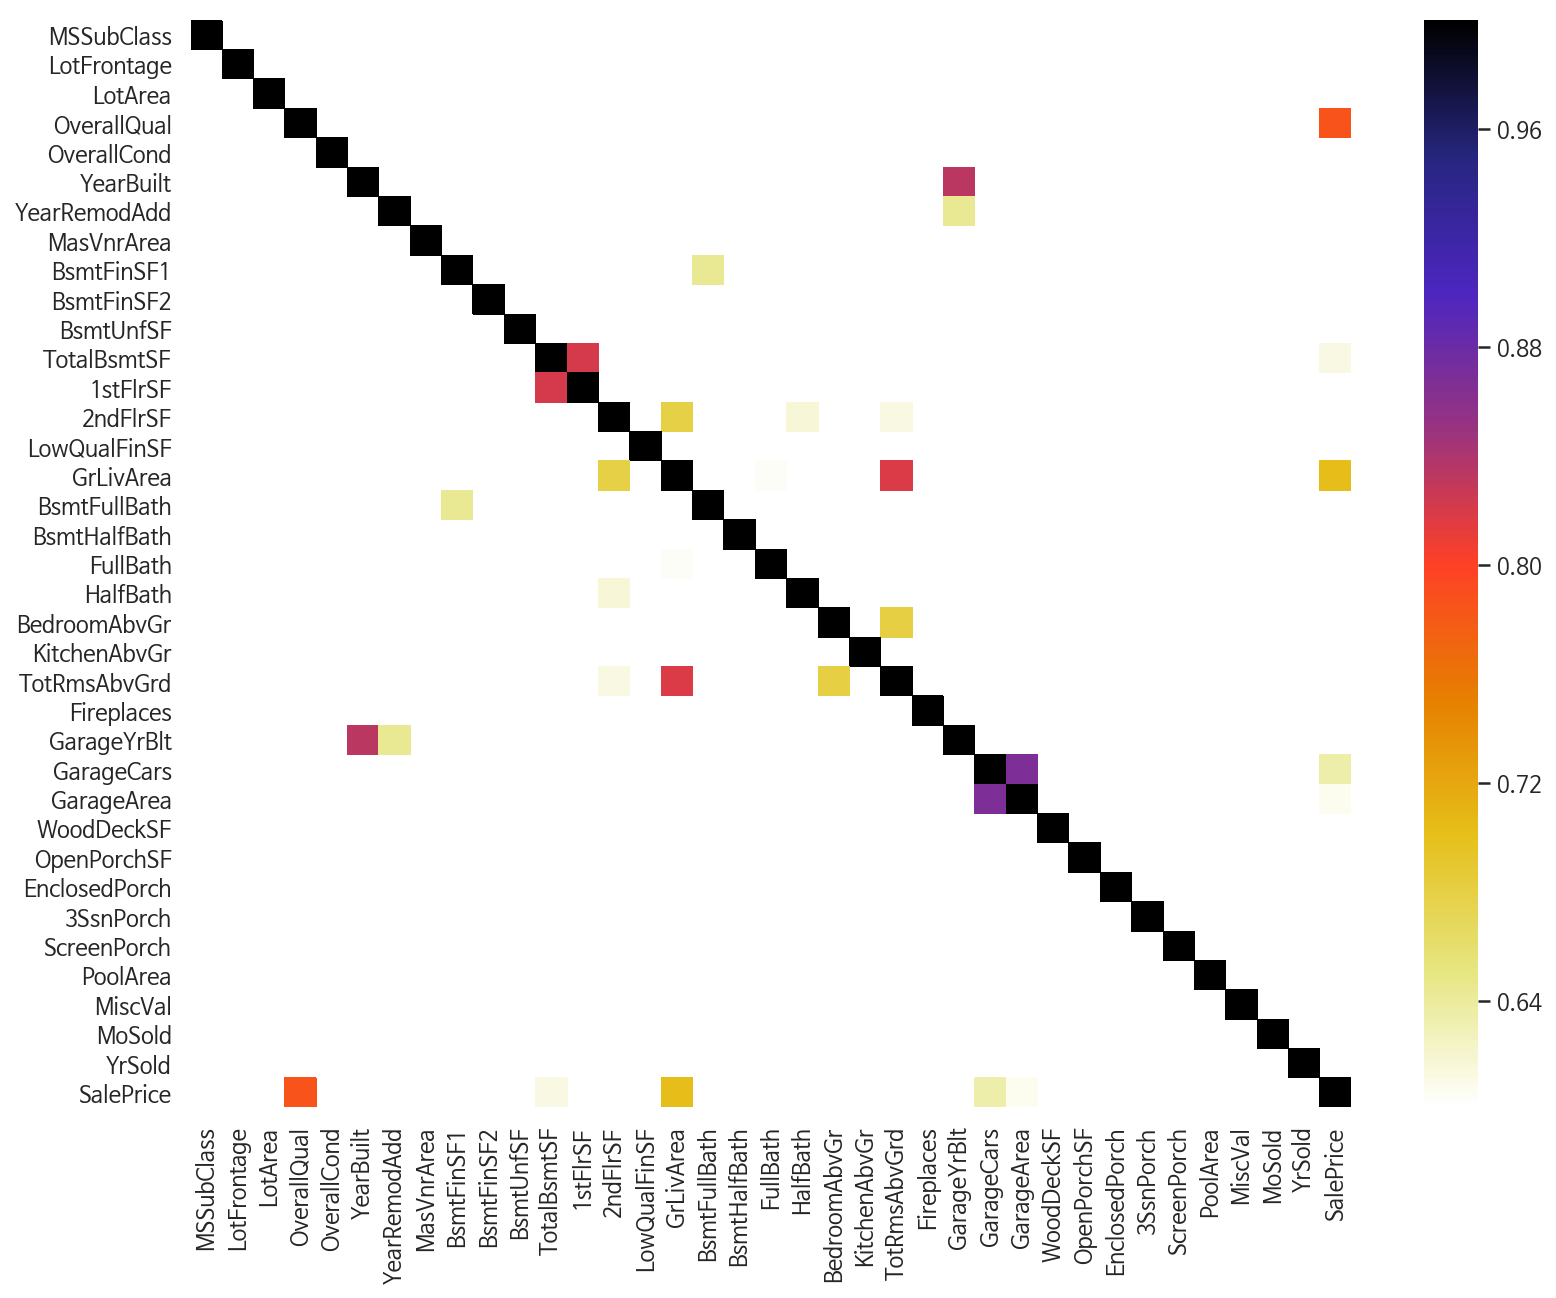

In [11]:
# 숫자형 변수끼리의 전체 상관관계 히트맵
plt.figure(figsize=(13,10))
df_corr = df_train.corr()
df_corr = df_corr.where(df_corr >= 0,   -df_corr) # 음의 상관관계에서도 높은 상관계수를 갖은 데이터를 히트맵으로 보기 위해 음수를 양수로 변경
sns.heatmap(df_corr.where(df_corr > 0.6), cmap="CMRmap_r") # 상관계수가 0.6 이상인 값만 히트맵에 표시

In [12]:
# 상관계수가 높은 조합 리스트
high_corr_list = []
for i in df_corr.columns:
    for j in df_corr.index[df_corr[i] > 0.6]:
        if (i != j) and (not sorted([i,j]) in high_corr_list) :
            high_corr_list.append(sorted([i,j]))
high_corr_list


[['GrLivArea', 'OverallQual'],
 ['OverallQual', 'SalePrice'],
 ['GarageYrBlt', 'YearBuilt'],
 ['GarageYrBlt', 'YearRemodAdd'],
 ['BsmtFinSF1', 'BsmtFullBath'],
 ['1stFlrSF', 'TotalBsmtSF'],
 ['SalePrice', 'TotalBsmtSF'],
 ['2ndFlrSF', 'GrLivArea'],
 ['2ndFlrSF', 'HalfBath'],
 ['2ndFlrSF', 'TotRmsAbvGrd'],
 ['FullBath', 'GrLivArea'],
 ['GrLivArea', 'TotRmsAbvGrd'],
 ['GrLivArea', 'SalePrice'],
 ['BedroomAbvGr', 'TotRmsAbvGrd'],
 ['GarageArea', 'GarageCars'],
 ['GarageCars', 'SalePrice'],
 ['GarageArea', 'SalePrice']]

상관관계 탑10 리스트:  Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to NanumBarunGothic.
  (prop.get_family(), self.defaultFamily[fontext]))


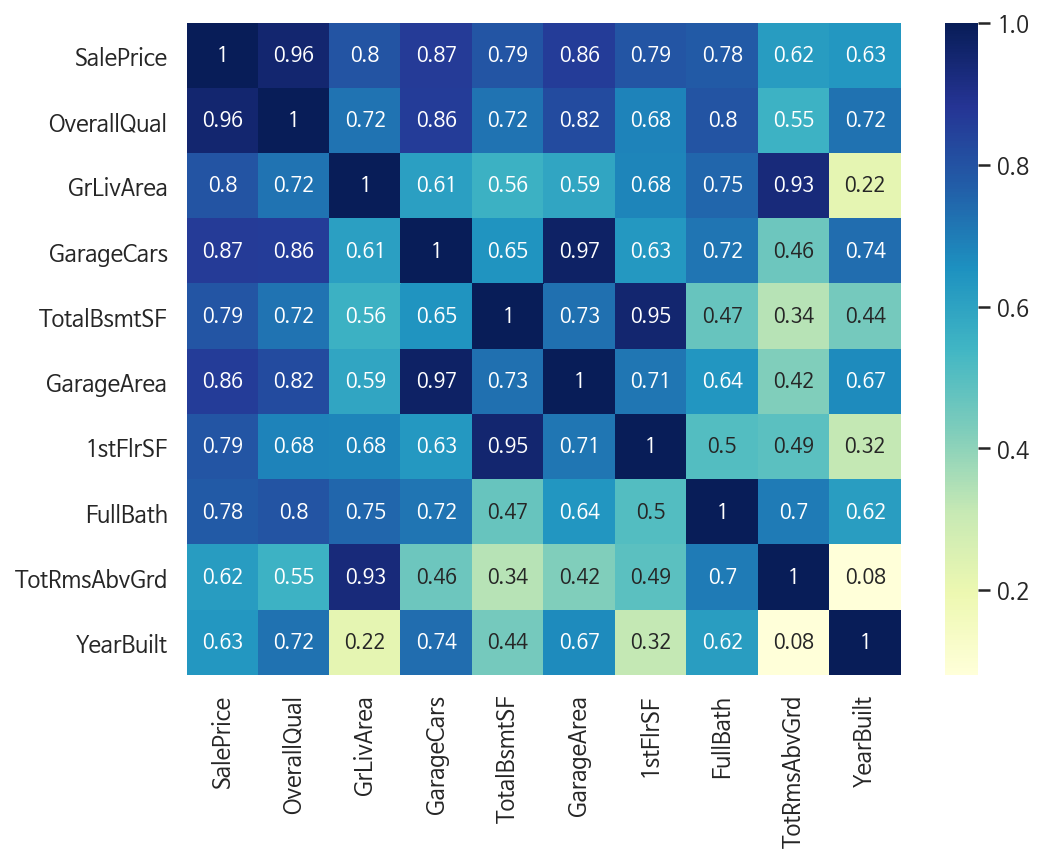

In [13]:
# 'SalePrice' 와 상관관계가 있는 컬럼 상위 10개 분류 
corrlist = df_corr.nlargest(10, 'SalePrice').index
print('상관관계 탑10 리스트: ',corrlist)
plt.figure(figsize=(8,6))
sns.heatmap(df_corr[corrlist].corr(), annot=True, cmap="YlGnBu")

### NaN값 처리

In [14]:
# NA값 있는 컬럼 확인 (19개)
col_null = df_train.count().index[df_train.count() != 1021]
col_null

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [15]:
# 컬럼별 NA값 내용 확인
na_list = df_train[col_null]
na_list

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
223,70.0,NaN,None,0.0,TA,TA,No,ALQ,LwQ,SBrkr,NaN,Detchd,1989.0,Unf,TA,TA,NaN,NaN,NaN
558,57.0,NaN,None,0.0,Gd,TA,Gd,GLQ,Unf,SBrkr,TA,Attchd,1996.0,Unf,TA,TA,NaN,NaN,NaN
512,70.0,NaN,None,0.0,TA,TA,No,BLQ,LwQ,SBrkr,NaN,Detchd,1964.0,Unf,TA,TA,NaN,NaN,NaN
601,50.0,NaN,None,0.0,TA,TA,No,Unf,Unf,SBrkr,Gd,Detchd,1979.0,Unf,TA,TA,NaN,NaN,NaN
556,69.0,NaN,None,0.0,TA,TA,No,Rec,Unf,FuseA,TA,Attchd,1957.0,Fin,TA,TA,NaN,MnWw,NaN
104,NaN,NaN,BrkFace,600.0,TA,TA,No,LwQ,Unf,FuseF,TA,Detchd,1951.0,Unf,TA,TA,NaN,NaN,NaN
528,58.0,NaN,None,0.0,TA,TA,Mn,ALQ,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1329,63.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1998.0,Fin,TA,TA,NaN,NaN,NaN
880,60.0,NaN,None,0.0,Ex,Gd,No,ALQ,Unf,SBrkr,NaN,Attchd,2005.0,Fin,TA,TA,NaN,NaN,NaN
1221,55.0,NaN,None,0.0,TA,TA,No,BLQ,LwQ,SBrkr,TA,Attchd,1968.0,Unf,TA,TA,NaN,NaN,NaN


In [16]:
# NA처리: LotFrontage (도로와 인접한 쪽 집의 폭)

# NA 값을 미 측정치라고 가정하고 상관관계가 있는 다른 컬럼인 LotArea를 이용하여 두 컬럼의 비율을 적용해 NA 예측값을 대입
Lot_col = df_train[['LotFrontage','LotArea']]

# LotArea/LotFrontage 값을 Div 컬럼에 넣음
Lot_col['Div'] = Lot_col['LotArea']/Lot_col['LotFrontage']
Lot_col

,LotFrontage,LotArea,Div
223,70.0,10500,150.000000
558,57.0,21872,383.719298
512,70.0,9100,130.000000
601,50.0,9000,180.000000
556,69.0,14850,215.217391
104,NaN,7758,NaN
528,58.0,9098,156.862069
1329,63.0,9084,144.190476
880,60.0,7024,117.066667
1221,55.0,8250,150.000000


In [17]:
Lot_col['Div'].describe()

count     850.000000
mean      140.877451
std        68.074942
min        50.000000
25%       115.275544
50%       129.618950
75%       150.000000
max      1141.306452
Name: Div, dtype: float64

In [18]:
print('Div값이 500 이상인 개수: ',len(Lot_col['Div'].dropna()[Lot_col['Div'].dropna() >= 500]))
# 500 을 기준으로 그 이상값들을 아웃라이어로 판단하고 제외
Lot_col['Div'].dropna()[Lot_col['Div'].dropna() < 500].describe()

Div값이 500 이상인 개수:  5


count    845.000000
mean     137.282403
std       46.949481
min       50.000000
25%      115.183333
50%      129.477273
75%      150.000000
max      446.608696
Name: Div, dtype: float64

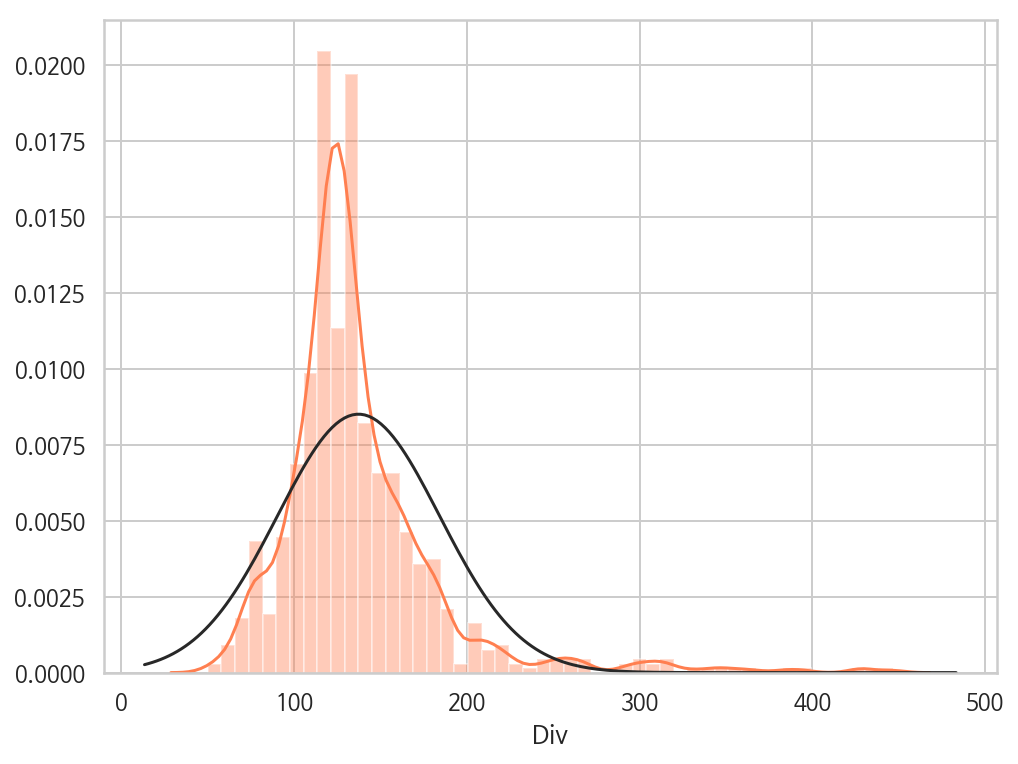

In [20]:
# 아웃라이어를 제외하고 분포그래프로 분포 확인
plt.figure(figsize=(8,6))
sns.distplot(Lot_col['Div'].dropna()[Lot_col['Div'].dropna() < 500], color='coral', fit=norm)

In [22]:
# 분류된 Div컬럼의 평균값을 이용해서 LotFrontage의 NA값을 예측하여 채움
Lot_mean = Lot_col['Div'].dropna()[Lot_col['Div'].dropna() < 500].mean()
na_list['LotFrontage'] = Lot_col['LotFrontage'].fillna(Lot_col['LotArea']/Lot_mean)

print('<처리후 NA 개수>\n',na_list['LotFrontage'].isna().sum())

<처리후 NA 개수>
 0


In [24]:
# NA처리: Alley (현관 들어오는 길 포장타입)
na_col = 'Alley'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값이 의미하는게 들어오는 길 자체가 없는것 이므로 NoAcss로 변경
na_list[na_col] = na_list[na_col].fillna('NoAcss')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Grvl    35
Pave    35
Name: Alley, dtype: int64

<NA 개수>
 951

<처리후 Value 종류>
 NoAcss    951
Grvl       35
Pave       35
Name: Alley, dtype: int64

<처리후 NA 개수>
 0


In [25]:
# NA처리: MasVnrType (골조 벽 덮게 타입) 
na_col = 'MasVnrType'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# 덮게 자체가 없다고 판단하여 None으로 변경
na_list[na_col] = na_list[na_col].fillna('None')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 None       600
BrkFace    314
Stone       91
BrkCmn      11
Name: MasVnrType, dtype: int64

<NA 개수>
 5

<처리후 Value 종류>
 None       605
BrkFace    314
Stone       91
BrkCmn      11
Name: MasVnrType, dtype: int64

<처리후 NA 개수>
 0


In [26]:
# NA처리: MasVnrArea (골조 벽 덮게 넓이) 
na_col = 'MasVnrArea'

print('<NA 개수>\n',na_list[na_col].isna().sum())

# MasVnrType을 None으로 바꿨기때문에 넓이도 0으로 변경
na_list[na_col] = na_list[na_col].fillna(0.0)
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<NA 개수>
 5

<처리후 NA 개수>
 0


In [27]:
# NA처리: BsmtQual (지하실 높이 점수)
na_col = 'BsmtQual'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 지하실이 없다는 뜻이므로 NoBsmt로 변경
na_list[na_col] = na_list[na_col].fillna('NoBsmt')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 TA    448
Gd    439
Ex     83
Fa     22
Name: BsmtQual, dtype: int64

<NA 개수>
 29

<처리후 Value 종류>
 TA        448
Gd        439
Ex         83
NoBsmt     29
Fa         22
Name: BsmtQual, dtype: int64

<처리후 NA 개수>
 0


In [28]:
# NA처리: BsmtCond (지하실 전체적 점수)
na_col = 'BsmtCond'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 지하실이 없다는 뜻이므로 NoBsmt로 변경
na_list[na_col] = na_list[na_col].fillna('NoBsmt')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 TA    920
Gd     42
Fa     29
Po      1
Name: BsmtCond, dtype: int64

<NA 개수>
 29

<처리후 Value 종류>
 TA        920
Gd         42
Fa         29
NoBsmt     29
Po          1
Name: BsmtCond, dtype: int64

<처리후 NA 개수>
 0


In [29]:
# NA처리: BsmtExposure (지하실 창문이 외부로 노출된 정도)
na_col = 'BsmtExposure'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 지하실이 없다는 뜻이므로 NoBsmt로 변경
na_list[na_col] = na_list[na_col].fillna('NoBsmt')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 No    663
Av    154
Gd     93
Mn     81
Name: BsmtExposure, dtype: int64

<NA 개수>
 30

<처리후 Value 종류>
 No        663
Av        154
Gd         93
Mn         81
NoBsmt     30
Name: BsmtExposure, dtype: int64

<처리후 NA 개수>
 0


In [30]:
# NA처리: BsmtFinType1 (지하실 거주 가능 점수)
na_col = 'BsmtFinType1'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 지하실이 없다는 뜻이므로 NoBsmt로 변경
na_list[na_col] = na_list[na_col].fillna('NoBsmt')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Unf    304
GLQ    291
ALQ    150
BLQ    109
Rec     92
LwQ     46
Name: BsmtFinType1, dtype: int64

<NA 개수>
 29

<처리후 Value 종류>
 Unf       304
GLQ       291
ALQ       150
BLQ       109
Rec        92
LwQ        46
NoBsmt     29
Name: BsmtFinType1, dtype: int64

<처리후 NA 개수>
 0


In [31]:
# NA처리: BsmtFinType2 (지하실 거주 가능 점수, 여러 종류일경우)
na_col = 'BsmtFinType2'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 지하실이 없다는 뜻이므로 NoBsmt로 변경
na_list[na_col] = na_list[na_col].fillna('NoBsmt')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Unf    880
Rec     33
LwQ     31
BLQ     26
ALQ     12
GLQ     10
Name: BsmtFinType2, dtype: int64

<NA 개수>
 29

<처리후 Value 종류>
 Unf       880
Rec        33
LwQ        31
NoBsmt     29
BLQ        26
ALQ        12
GLQ        10
Name: BsmtFinType2, dtype: int64

<처리후 NA 개수>
 0


In [32]:
# NA처리: Electrical (전력 시스템 관련)
na_col = 'Electrical'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# 정보를 알수 없기때문에 새로운 카테고리 None 생성
na_list[na_col] = na_list[na_col].fillna('None')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 SBrkr    934
FuseA     62
FuseF     22
FuseP      2
Name: Electrical, dtype: int64

<NA 개수>
 1

<처리후 Value 종류>
 SBrkr    934
FuseA     62
FuseF     22
FuseP      2
None       1
Name: Electrical, dtype: int64

<처리후 NA 개수>
 0


In [33]:
# NA처리: FireplaceQu (벽난로 퀄리티)
na_col = 'FireplaceQu'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 벽난로가 없다는 뜻이므로 NoF로 변경
na_list[na_col] = na_list[na_col].fillna('NoF')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Gd    264
TA    219
Fa     27
Ex     18
Po     12
Name: FireplaceQu, dtype: int64

<NA 개수>
 481

<처리후 Value 종류>
 NoF    481
Gd     264
TA     219
Fa      27
Ex      18
Po      12
Name: FireplaceQu, dtype: int64

<처리후 NA 개수>
 0


In [34]:
# NA처리: GarageType (차고 위치)
na_col = 'GarageType'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 차고가 없다는 뜻이므로 NoGrage로 변경
na_list[na_col] = na_list[na_col].fillna('NoGrage')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Attchd     607
Detchd     268
BuiltIn     61
Basment     17
CarPort      6
2Types       5
Name: GarageType, dtype: int64

<NA 개수>
 57

<처리후 Value 종류>
 Attchd     607
Detchd     268
BuiltIn     61
NoGrage     57
Basment     17
CarPort      6
2Types       5
Name: GarageType, dtype: int64

<처리후 NA 개수>
 0


In [35]:
# NA처리: GarageYrBlt (차고 지어진 년도)
na_col = 'GarageYrBlt'

print('<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 차고가 없다는 뜻이므로 NoGrage로 변경
na_list[na_col] = na_list[na_col].fillna('NoGrage')
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<NA 개수>
 57

<처리후 NA 개수>
 0


In [36]:
# NA처리: GarageFinish (차고 내부 인테리어 완성정도)
na_col = 'GarageFinish'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 차고가 없다는 뜻이므로 NoGrage로 변경
na_list[na_col] = na_list[na_col].fillna('NoGrage')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Unf    422
RFn    292
Fin    250
Name: GarageFinish, dtype: int64

<NA 개수>
 57

<처리후 Value 종류>
 Unf        422
RFn        292
Fin        250
NoGrage     57
Name: GarageFinish, dtype: int64

<처리후 NA 개수>
 0


In [37]:
# NA처리: GarageQual (차고 퀄리티)
na_col = 'GarageQual'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 차고가 없다는 뜻이므로 NoGrage로 변경
na_list[na_col] = na_list[na_col].fillna('NoGrage')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 TA    923
Fa     30
Gd      8
Ex      2
Po      1
Name: GarageQual, dtype: int64

<NA 개수>
 57

<처리후 Value 종류>
 TA         923
NoGrage     57
Fa          30
Gd           8
Ex           2
Po           1
Name: GarageQual, dtype: int64

<처리후 NA 개수>
 0


In [38]:
# NA처리: GarageCond (차고 상태)
na_col = 'GarageCond'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 차고가 없다는 뜻이므로 NoGrage로 변경
na_list[na_col] = na_list[na_col].fillna('NoGrage')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 TA    930
Fa     23
Gd      8
Po      2
Ex      1
Name: GarageCond, dtype: int64

<NA 개수>
 57

<처리후 Value 종류>
 TA         930
NoGrage     57
Fa          23
Gd           8
Po           2
Ex           1
Name: GarageCond, dtype: int64

<처리후 NA 개수>
 0


In [39]:
# NA처리: PoolQC (수영장 퀄리티)
na_col = 'PoolQC'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 수영장이 없다는 뜻이므로 NoPool로 변경
na_list[na_col] = na_list[na_col].fillna('NoPool')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

<NA 개수>
 1014

<처리후 Value 종류>
 NoPool    1014
Gd           3
Fa           2
Ex           2
Name: PoolQC, dtype: int64

<처리후 NA 개수>
 0


In [40]:
# NA처리: Fence (울타리 퀄리티)
na_col = 'Fence'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 울타리가 없다는 뜻이므로 NoFnc로 변경
na_list[na_col] = na_list[na_col].fillna('NoFnc')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 MnPrv    110
GdPrv     45
GdWo      43
MnWw       7
Name: Fence, dtype: int64

<NA 개수>
 816

<처리후 Value 종류>
 NoFnc    816
MnPrv    110
GdPrv     45
GdWo      43
MnWw       7
Name: Fence, dtype: int64

<처리후 NA 개수>
 0


In [41]:
# NA처리: MiscFeature (기타 특징들)
na_col = 'MiscFeature'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 기타 특징이 없다는 뜻이므로 Nothing로 변경
na_list[na_col] = na_list[na_col].fillna('Nothing')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Shed    33
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

<NA 개수>
 983

<처리후 Value 종류>
 Nothing    983
Shed        33
Othr         2
Gar2         2
TenC         1
Name: MiscFeature, dtype: int64

<처리후 NA 개수>
 0


In [42]:
# 전체 NA 처리 확인
na_list.isna().sum()

LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [43]:
# df_train 으로 NA값 정리한 데이터 이동
for i in col_null:
    df_train[i] = na_list[i]
df_train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

### categorical와 quantitative 항목 분류

In [44]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
223,20,RL,70.0,10500,Pave,NoAcss,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,524,LwQ,180,160,864,GasA,Gd,Y,SBrkr,864,0,0,864,0,0,1,0,2,1,TA,4,Typ,0,NoF,Detchd,1989,Unf,2,576,TA,TA,Y,216,0,0,0,0,0,NoPool,NoFnc,Nothing,0,3,2009,WD,Abnorml,97000
558,60,RL,57.0,21872,Pave,NoAcss,IR2,HLS,AllPub,FR2,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,604,Unf,0,125,729,GasA,Ex,Y,SBrkr,729,717,0,1446,0,1,2,1,3,1,TA,6,Typ,1,TA,Attchd,1996,Unf,2,406,TA,TA,Y,264,22,0,0,0,0,NoPool,NoFnc,Nothing,0,8,2008,WD,Normal,175000
512,20,RL,70.0,9100,Pave,NoAcss,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,521,LwQ,174,169,864,GasA,TA,Y,SBrkr,864,0,0,864,1,0,1,0,3,1,TA,5,Typ,0,NoF,Detchd,1964,Unf,2,624,TA,TA,Y,0,0,0,0,0,0,NoPool,NoFnc,Nothing,0,7,2006,WD,Normal,129900
601,50,RM,50.0,9000,Pave,NoAcss,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,6,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0,Unf,0,780,780,GasA,TA,Y,SBrkr,780,595,0,1375,0,0,1,1,3,1,Gd,6,Typ,1,Gd,Detchd,1979,Unf,1,544,TA,TA,P,0,162,0,0,126,0,NoPool,NoFnc,Nothing,0,12,2007,WD,Normal,141000
556,20,RL,69.0,14850,Pave,NoAcss,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1957,1957,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,895,Unf,0,197,1092,GasA,TA,Y,FuseA,1092,0,0,1092,1,0,1,0,2,1,TA,6,Typ,1,TA,Attchd,1957,Fin,1,299,TA,TA,Y,268,0,0,0,122,0,NoPool,MnWw,Nothing,0,5,2006,WD,Normal,141000


In [45]:
col_cat = []
col_quan = []
for i in df_train.columns:
    if df_train[i].dtype == 'object':
        col_cat.append(i)
    else:
        col_quan.append(i)
# 범주형 컬럼 개수
print(len(col_cat))
# 숫자형 컬럼 개수
print(len(col_quan))
    

44
36


### 각 컬럼별 분석 및 수정

In [46]:
df_train[col_quan]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
223,20,70.000000,10500,4,6,1971,1971,0.0,524,180,160,864,864,0,0,864,0,0,1,0,2,1,4,0,2,576,216,0,0,0,0,0,0,3,2009,97000
558,60,57.000000,21872,7,5,1996,1997,0.0,604,0,125,729,729,717,0,1446,0,1,2,1,3,1,6,1,2,406,264,22,0,0,0,0,0,8,2008,175000
512,20,70.000000,9100,5,5,1958,1958,0.0,521,174,169,864,864,0,0,864,1,0,1,0,3,1,5,0,2,624,0,0,0,0,0,0,0,7,2006,129900
601,50,50.000000,9000,6,6,1937,1950,0.0,0,0,780,780,780,595,0,1375,0,0,1,1,3,1,6,1,1,544,0,162,0,0,126,0,0,12,2007,141000
556,20,69.000000,14850,5,5,1957,1957,0.0,895,0,197,1092,1092,0,0,1092,1,0,1,0,2,1,6,1,1,299,268,0,0,0,122,0,0,5,2006,141000
104,50,56.511249,7758,7,4,1931,1950,600.0,224,0,816,1040,1226,592,0,1818,0,0,1,1,4,1,7,2,1,240,0,0,0,0,184,0,0,6,2007,169500
528,30,58.000000,9098,4,7,1920,2002,0.0,348,0,180,528,605,0,0,605,1,0,1,0,2,1,5,0,0,0,0,0,144,0,0,0,0,7,2007,86000
1329,60,63.000000,9084,7,5,1998,1998,0.0,0,0,935,935,955,677,0,1632,0,0,2,1,3,1,8,1,2,462,0,28,0,0,0,0,0,6,2006,176500
880,20,60.000000,7024,5,5,2005,2006,0.0,980,0,110,1090,1090,0,0,1090,1,0,1,1,2,1,5,0,2,450,0,49,0,0,0,0,0,6,2007,157000
1221,20,55.000000,8250,5,5,1968,1968,0.0,250,492,210,952,1211,0,0,1211,0,0,1,0,3,1,5,1,1,322,0,63,0,0,0,0,0,8,2008,134000


In [52]:
# MSSubClass : 주거 타입 (범주형으로 수정하기)
'''
        20	1-STORY 1946 & NEWER ALL STYLES -> S1NEW
        30	1-STORY 1945 & OLDER -> S1OLD
        40	1-STORY W/FINISHED ATTIC ALL AGES -> S1FA
        45	1-1/2 STORY - UNFINISHED ALL AGES -> S1hUFA
        50	1-1/2 STORY FINISHED ALL AGES -> S1hFA
        60	2-STORY 1946 & NEWER -> S2NEW
        70	2-STORY 1945 & OLDER -> S2OLD
        75	2-1/2 STORY ALL AGES -> S2h
        80	SPLIT OR MULTI-LEVEL -> SML
        85	SPLIT FOYER -> SF
        90	DUPLEX - ALL STYLES AND AGES -> DPL
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER -> S1PNEW
       150	1-1/2 STORY PUD - ALL AGES -> S1hSP
       160	2-STORY PUD - 1946 & NEWER -> S2PNEW
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER -> PMI
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES -> F2
'''

df_train['MSSubClass'] = np.select([df_train['MSSubClass']==20,
                                   df_train['MSSubClass']==30,df_train['MSSubClass']==40,
                                   df_train['MSSubClass']==45,df_train['MSSubClass']==50,
                                   df_train['MSSubClass']==60,df_train['MSSubClass']==70,
                                   df_train['MSSubClass']==75,df_train['MSSubClass']==80,
                                   df_train['MSSubClass']==85,df_train['MSSubClass']==90,
                                   df_train['MSSubClass']==120,df_train['MSSubClass']==150,
                                   df_train['MSSubClass']==160,df_train['MSSubClass']==180,
                                   df_train['MSSubClass']==190,], ['S1NEW', 'S1OLD', 'S1FA', 'S1hUFA', 'S1hFA', 'S2NEW', 'S2OLD',
                                                                    'S2h', 'SML', 'SF', 'DPL', 'S1PNEW', 'S1hSP', 'S2PNEW', 'PMI', 'F2'])
col_cat.append(col_quan.pop(0))
df_train[col_cat].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass
223,RL,Pave,NoAcss,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,No,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,NoF,Detchd,1989,Unf,TA,TA,Y,NoPool,NoFnc,Nothing,WD,Abnorml,S1NEW
558,RL,Pave,NoAcss,IR2,HLS,AllPub,FR2,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,PConc,Gd,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1996,Unf,TA,TA,Y,NoPool,NoFnc,Nothing,WD,Normal,S2NEW
512,RL,Pave,NoAcss,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,BLQ,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NoF,Detchd,1964,Unf,TA,TA,Y,NoPool,NoFnc,Nothing,WD,Normal,S1NEW
601,RM,Pave,NoAcss,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,Gd,PConc,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Detchd,1979,Unf,TA,TA,P,NoPool,NoFnc,Nothing,WD,Normal,S1hFA
556,RL,Pave,NoAcss,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,FuseA,TA,Typ,TA,Attchd,1957,Fin,TA,TA,Y,NoPool,MnWw,Nothing,WD,Normal,S1NEW


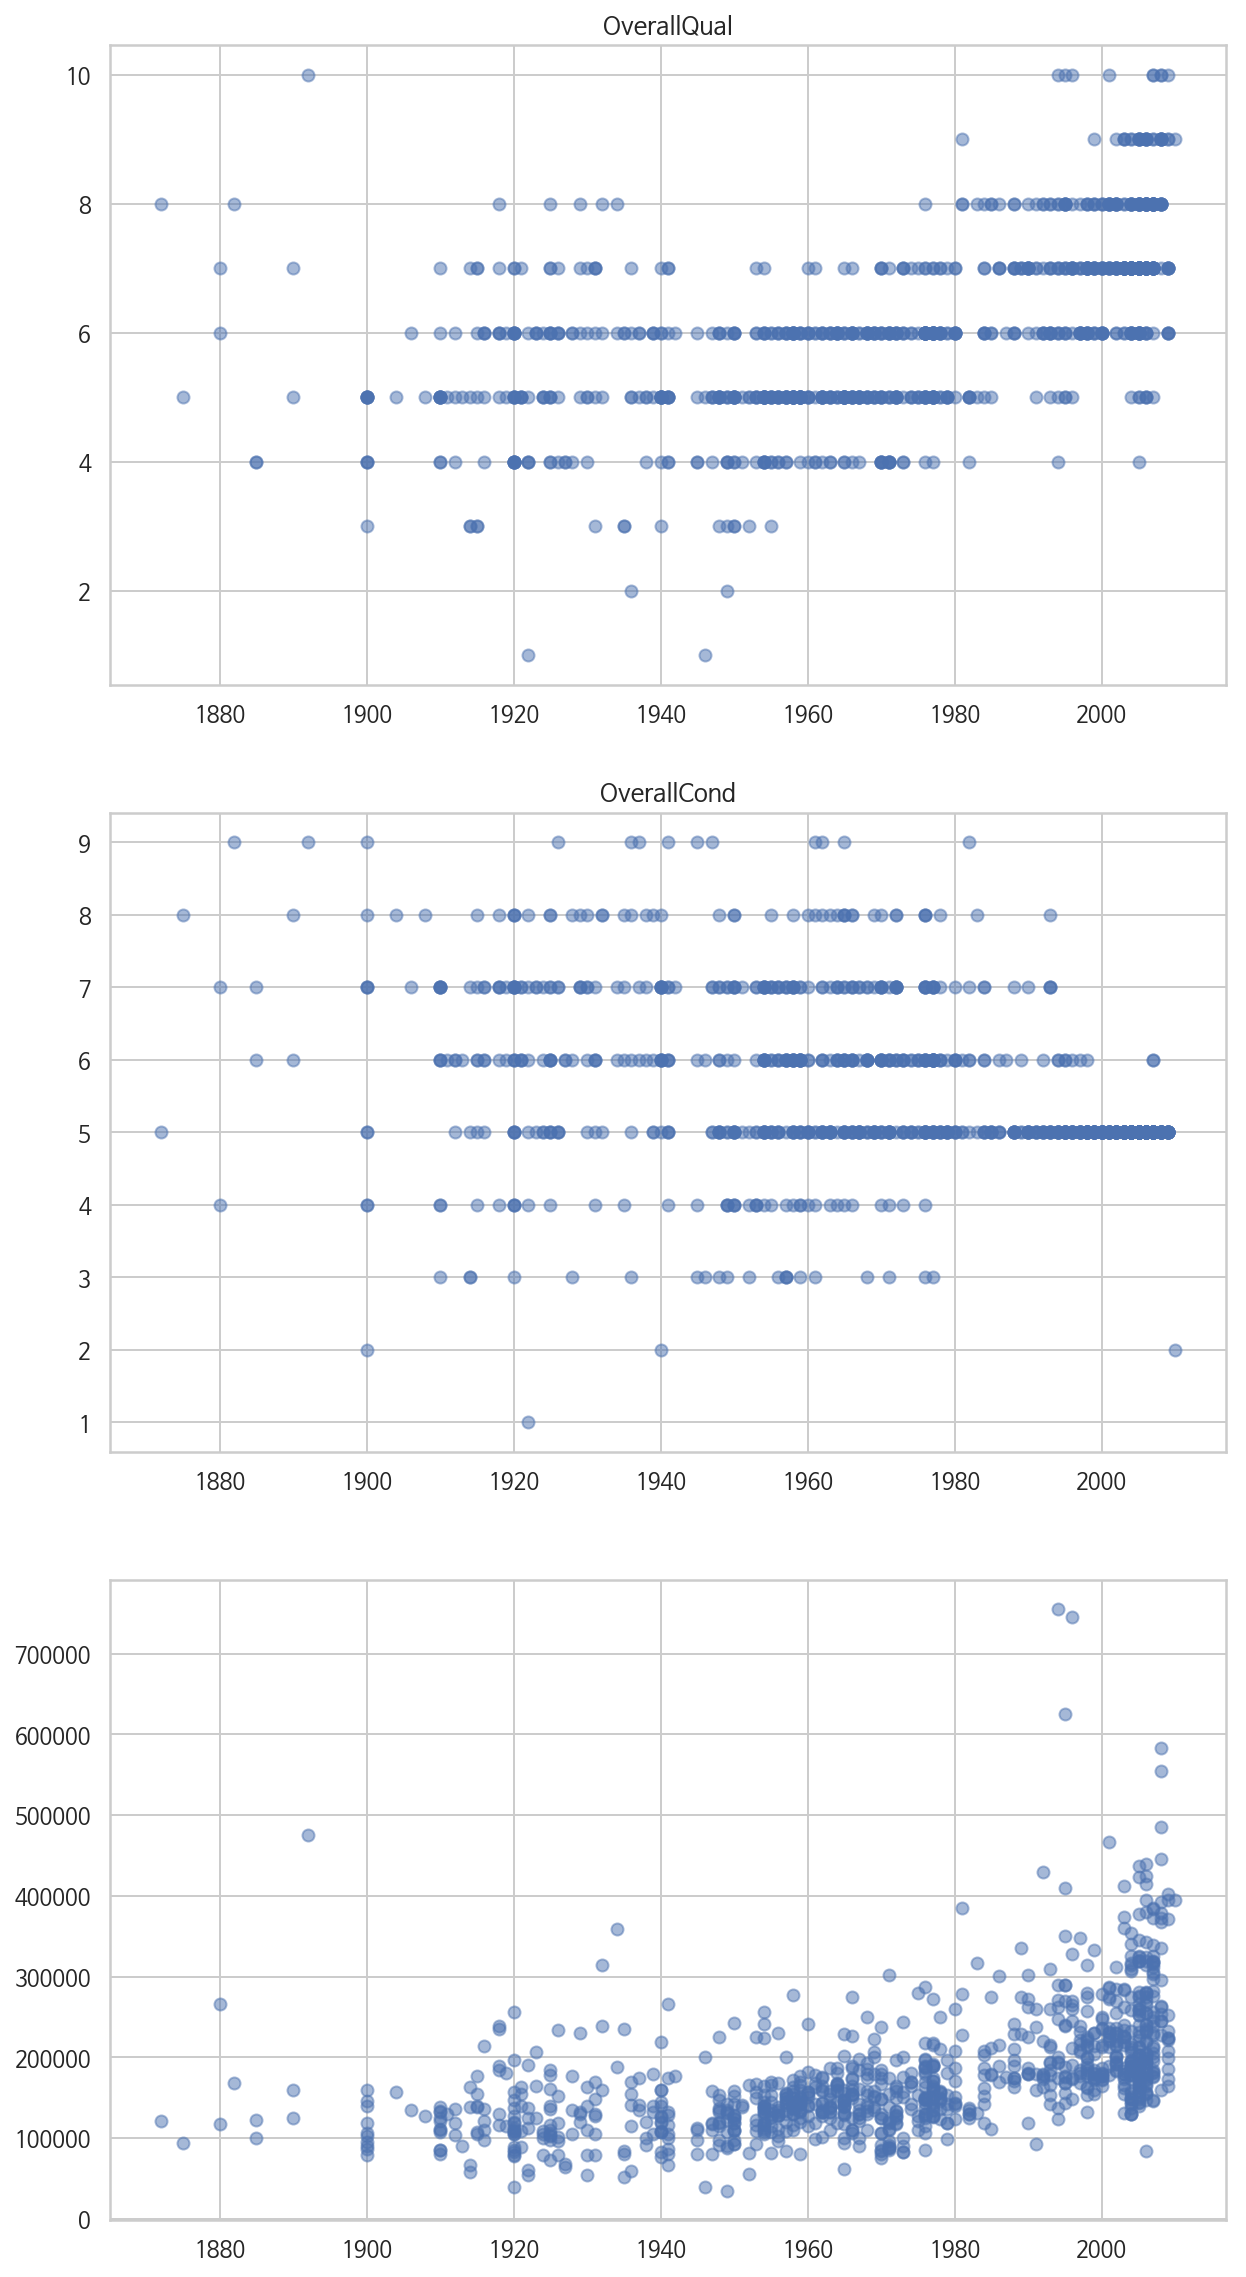

In [68]:
# OverallQual, OverallCond, YearBuilt, YearRemodAdd
plt.figure(figsize=(10,20))
ax1 = plt.subplot(3,1,1)
ax1.scatter(x=df_train['YearBuilt'], y=df_train['OverallQual'], alpha=0.5)
ax1.set_title('OverallQual')
ax2 = plt.subplot(3,1,2)
ax2.scatter(x=df_train['YearBuilt'], y=df_train['OverallCond'], alpha=0.5)
ax2.set_title('OverallCond')
ax3 = plt.subplot(3,1,3)
ax3.scatter(x=df_train['YearBuilt'], y=df_train['SalePrice'], alpha=0.5)

(array([129.,  24.,  25.,  24.,  26.,  34.,  42.,  35.,  36.,  39.,  18.,
         16.,  18.,  28.,  36.,  63.,  85.,  77., 164., 102.]),
 array([1950., 1953., 1956., 1959., 1962., 1965., 1968., 1971., 1974.,
        1977., 1980., 1983., 1986., 1989., 1992., 1995., 1998., 2001.,
        2004., 2007., 2010.]),
 <a list of 20 Patch objects>)

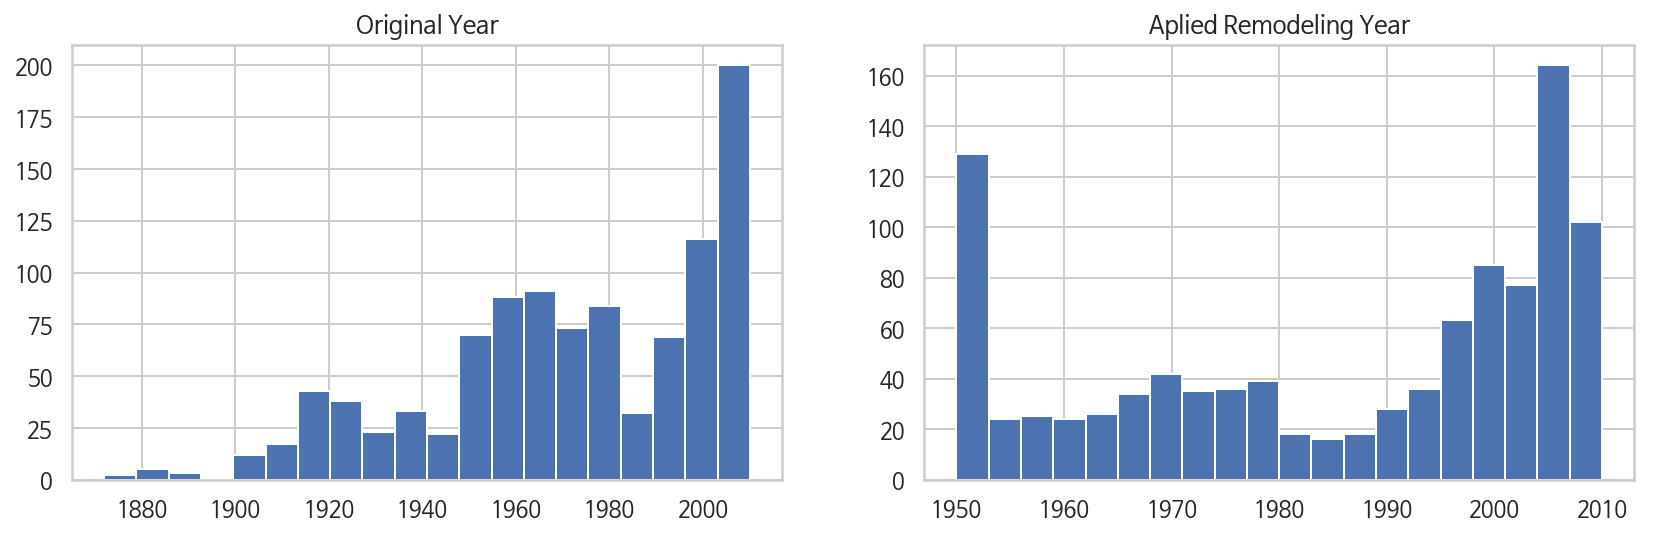

In [87]:
plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
ax1.set_title('Original Year')
ax1.hist(df_train['YearBuilt'],bins=20)
ax2 = plt.subplot(122)
ax2.set_title('Aplied Remodeling Year')
ax2.hist(df_train['YearRemodAdd'],bins=20)

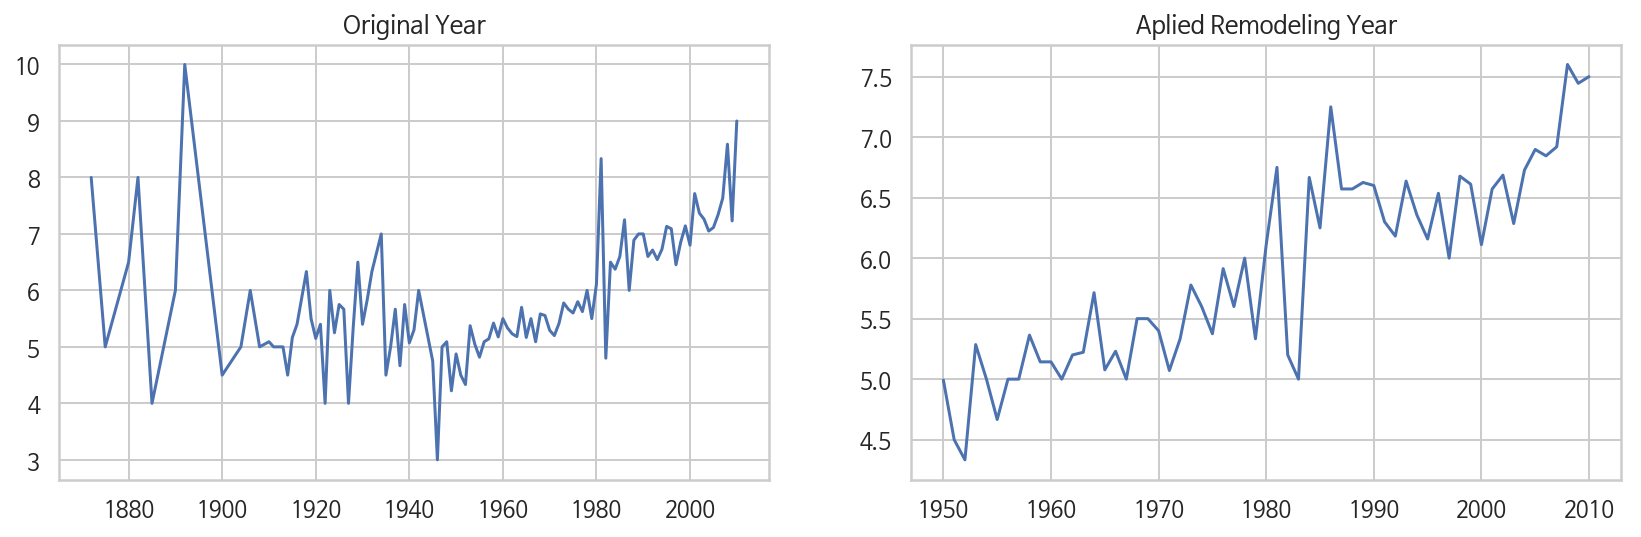

In [83]:
# 1950년 전으로는 데이터 양이 적고 이상치 때문에 평균값 그래프가 일정하지 않음
# 1950년 이후로는 최신 지어진 집 일수록 평점이 높은 경향이 있음
# 리모델링 연식으로 그래프를 그려보면 최신식 일 수록 평점이 높아지는 것을 볼 수 있음
plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
ax1.set_title('Original Year')
ax1.plot(df_train.groupby('YearBuilt')['OverallQual'].mean())
ax2 = plt.subplot(122)
ax2.set_title('Aplied Remodeling Year')
ax2.plot(df_train.groupby('YearRemodAdd')['OverallQual'].mean())

In [104]:
# 리모델링 연식으로 구하는식이 좀 더 적합하고 오리지날 연식도 포함 하므로 오리지날 연식 데이터를 제외
df_train = df_train.drop('YearBuilt', axis=1)
len(df_train.columns)

79

Text(0, 0.5, 'OverallCond')

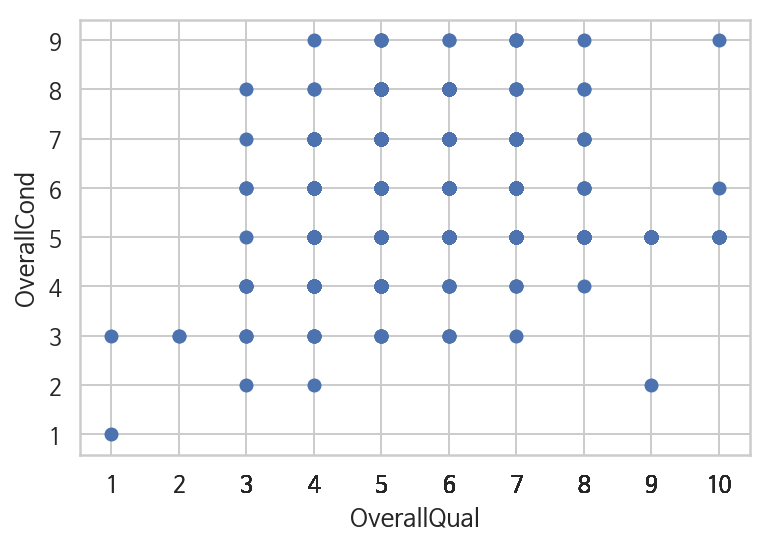

In [101]:
ax1 = plt.scatter(x=df_train['OverallQual'], y=df_train['OverallCond'] )
plt.xticks(df_train['OverallQual'])
plt.xlabel('OverallQual')
plt.ylabel('OverallCond')

In [113]:
# MasVnrType이 None인데 MasVnrArea 값이 있는 행 검색
df_train[df_train['MasVnrType'] == 'None'][['MasVnrType','MasVnrArea']][df_train[df_train['MasVnrType'] == 'None']['MasVnrArea']!=0]

,MasVnrType,MasVnrArea
624,None,288.0
1334,None,312.0
1230,None,1.0


In [120]:
# 검색된 값을 0으로 변환
df_train.loc[[624,1334,1230],'MasVnrArea'] = 0.0

In [126]:
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF
# 전체 지하실 넓이를 나타내는 TotalBsmtSF만 남기고 분석에서 제외
df_train = df_train.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1)
len(df_train.columns)

76

In [127]:
# 1stFlrSF, 2ndFlrSF, GrLivArea
# 층별 넓이를 나눠서 나타내주는것이 적합하다고 판단하여 GrLivArea 컬럼을 제외
df_train = df_train.drop(['GrLivArea'], axis=1)
len(df_train.columns)

75

In [128]:
# 컬럼이름이 숫자로 시작하는 컬럼 이름을 영문으로 시작하도록 변경
df_train.rename(columns={'1stFlrSF':'FstFlrSF','2ndFlrSF':'SndFlrSF'}, inplace=True)

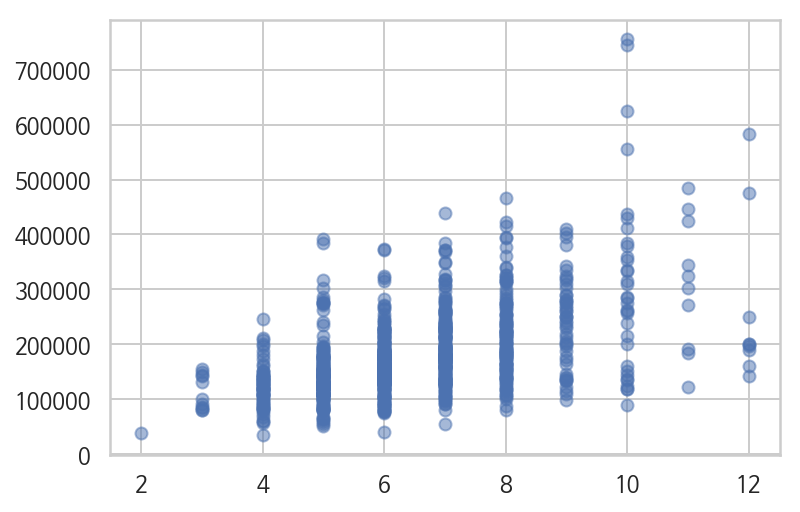

In [132]:
# TotRmsAbvGrd
plt.scatter(x=df_train['TotRmsAbvGrd'], y=df_train['SalePrice'], alpha=0.5)

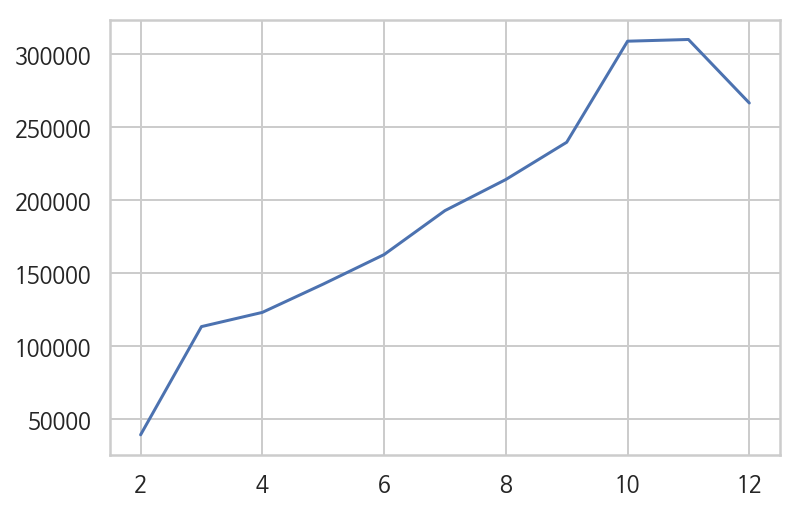

In [135]:
plt.plot(df_train.groupby('TotRmsAbvGrd')[['SalePrice']].mean())

In [140]:
# 다중공선성 문제 가능성
df_origin[['GrLivArea','TotRmsAbvGrd']].corr()

,GrLivArea,TotRmsAbvGrd
GrLivArea,1.000000,0.825489
TotRmsAbvGrd,0.825489,1.000000


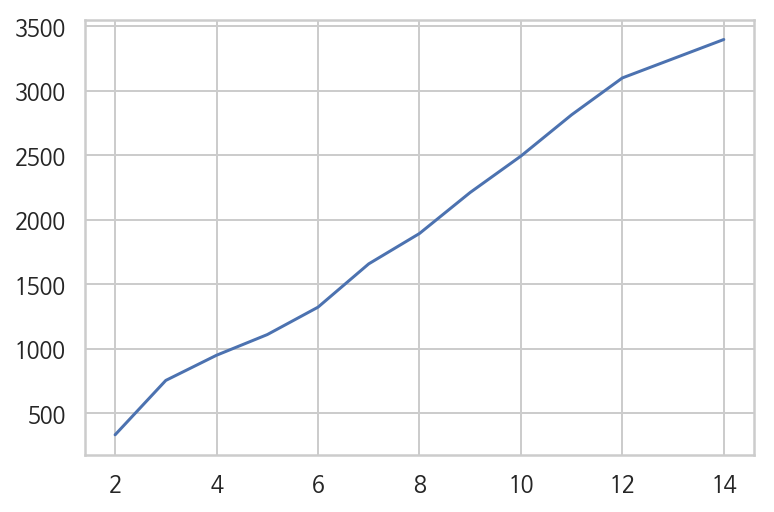

In [144]:
plt.plot(df_origin.groupby('TotRmsAbvGrd')[['GrLivArea']].mean())

In [170]:
# OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch (처마, 지붕같이)
# Porch 컬럼 생성 (단순하게 Porch가 있는지 없는지 여부)
df_train['Porch'] = np.where(((df_train['OpenPorchSF'] !=0) | (df_train['EnclosedPorch'] !=0) | (df_train['3SsnPorch']!=0) | (df_train['ScreenPorch'] != 0)), 1, 0)

In [172]:
df_train[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch' ,'ScreenPorch','Porch']].head()

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Porch
223,0,0,0,0,0
558,22,0,0,0,1
512,0,0,0,0,0
601,162,0,0,126,1
556,0,0,0,122,1


In [173]:
# Porch 외의 컬럼 제외
df_train.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch' ,'ScreenPorch'], axis=1, inplace=True)

In [174]:
# MoSold, YrSold (팔린 년도 월)
df_train[['MoSold','YrSold','SalePrice']].head()

,MoSold,YrSold,SalePrice
223,3,2009,97000
558,8,2008,175000
512,7,2006,129900
601,12,2007,141000
556,5,2006,141000


In [184]:
len(str(df_train['MoSold']) + str(df_train['YrSold']))

1544

In [175]:
df_train['YrMo'] = 

MoSold
1     190359.395349
2     179994.380952
3     186109.900000
4     173581.269663
5     163203.529412
6     173376.235632
7     178138.184524
8     181627.186813
9     203342.086957
10    176527.275862
11    200562.416667
12    183300.522727
Name: SalePrice, dtype: float64

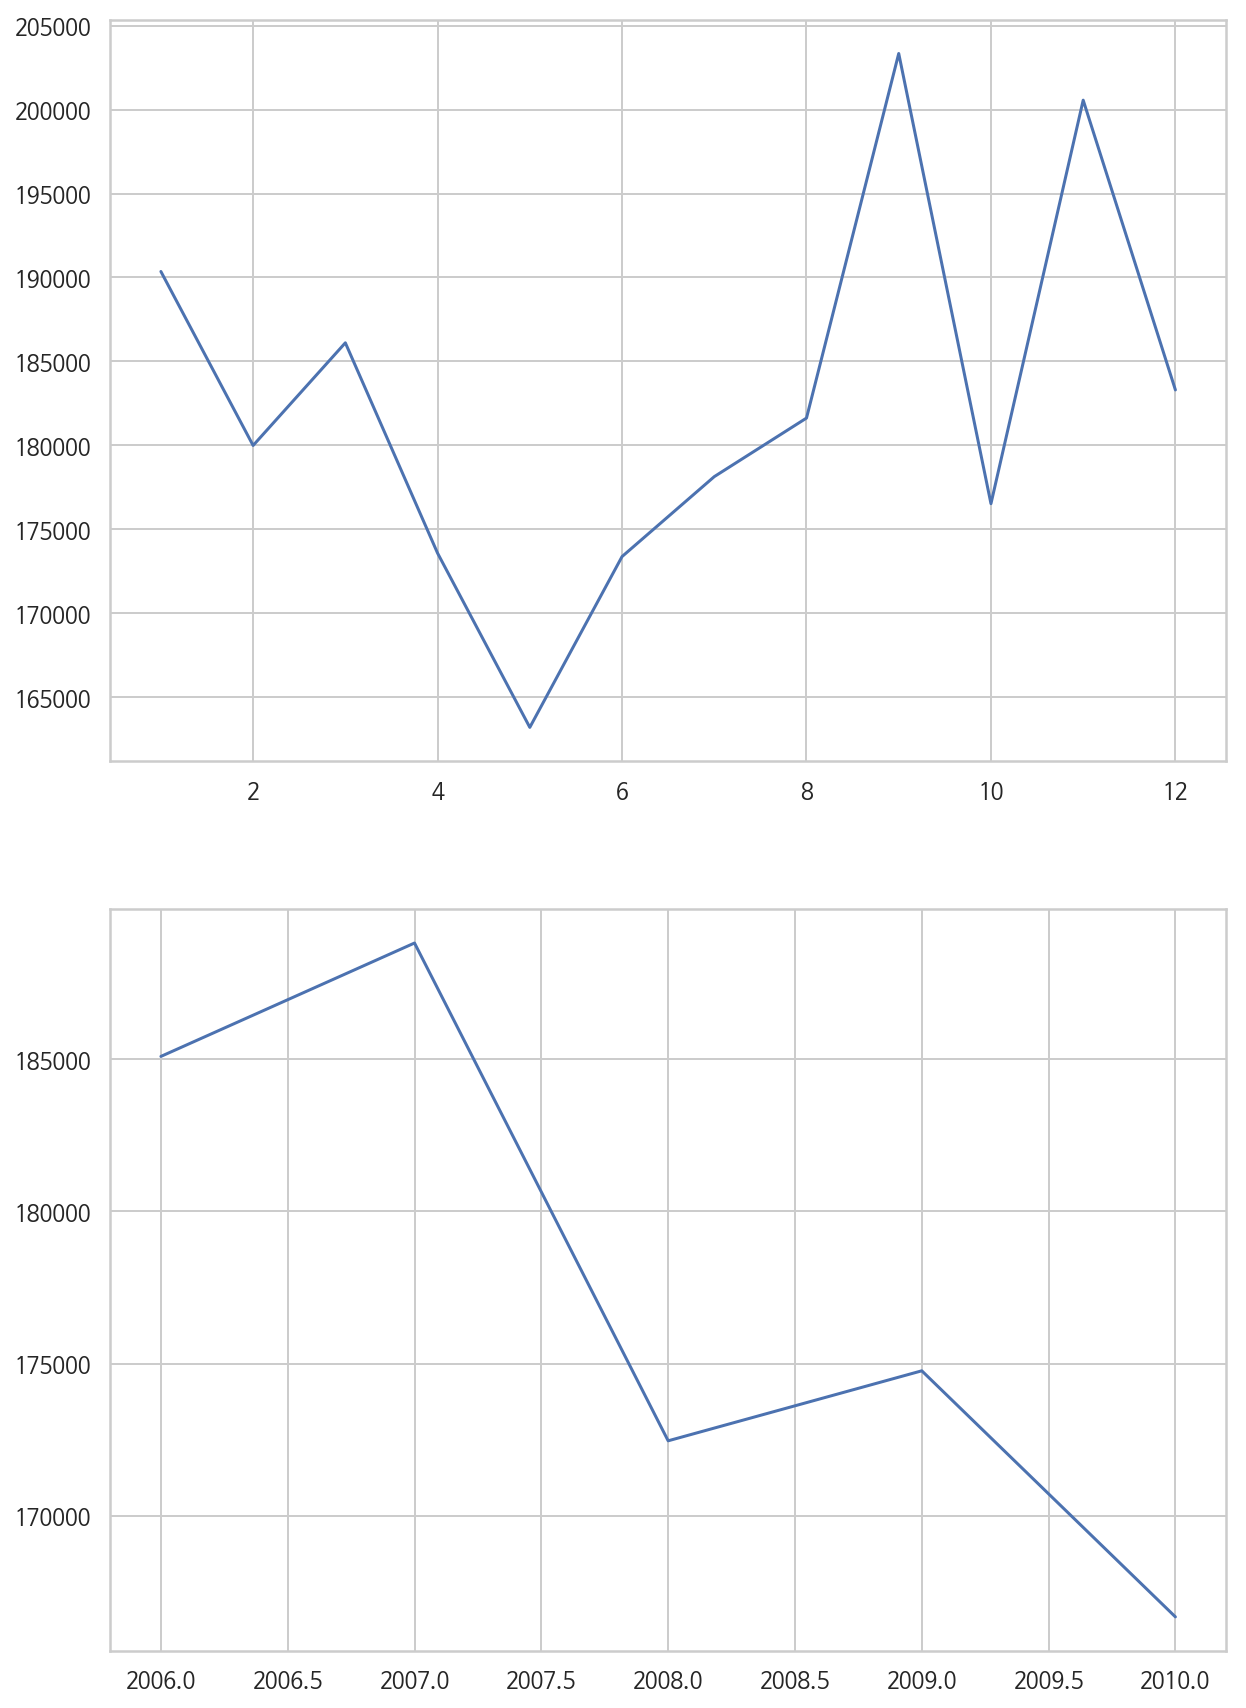

In [181]:
plt.figure(figsize=(10, 15))
ax1 = plt.subplot(211)
ax1.plot(df_train.groupby('MoSold')['SalePrice'].mean())
ax2 = plt.subplot(212)
ax2.plot(df_train.groupby('YrSold')['SalePrice'].mean())
